In [1]:
#Stock Market Analysis of 4 stocks - Amazon, Apple, Google and Microsoft
#Preliminary analysis
# Returns analysis
#Correlation with pairplots, pairgrids and jointplots
# Risk Analysis
# Monte Carlo Simulation for AMZN stock after 10000 simulations



# Standard imports
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# Statistic imports

from scipy import stats

#Plotting imports
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

#To give a white background to the visualization
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from pandas_datareader import DataReader
from datetime import datetime

In [3]:
stock_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
end = datetime.now()

In [6]:
start = datetime(end.year-1,end.month,end.day)
start

datetime.datetime(2018, 7, 28, 0, 0)

In [8]:
for  stock in stock_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [9]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-30,1829.500000,1766.020020,1827.329956,1779.219971,6562300,1779.219971
2018-07-31,1801.829956,1739.319946,1786.489990,1777.439941,5738700,1777.439941
2018-08-01,1798.439941,1776.020020,1784.000000,1797.170044,4153100,1797.170044
2018-08-02,1836.560059,1786.000000,1788.770020,1834.329956,4354700,1834.329956
2018-08-03,1841.000000,1821.500000,1837.739990,1823.290039,3460500,1823.290039


In [10]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,1803.324080,1761.660521,1784.270436,1783.120563,5.247656e+06,1783.120563
std,144.967096,155.221238,150.889478,150.269274,2.326227e+06,150.269274
min,1396.030029,1307.000000,1346.000000,1343.959961,1.690300e+06,1343.959961
25%,1675.522522,1627.010010,1656.079987,1656.309967,3.560975e+06,1656.309967
50%,1829.109985,1786.640015,1815.835022,1814.834961,4.636600e+06,1814.834961
75%,1921.640045,1895.844971,1911.507477,1905.267517,6.367125e+06,1905.267517
max,2050.500000,2013.000000,2038.109985,2039.510010,1.496380e+07,2039.510010


In [11]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-07-30 to 2019-07-26
Data columns (total 6 columns):
High         250 non-null float64
Low          250 non-null float64
Open         250 non-null float64
Close        250 non-null float64
Volume       250 non-null int64
Adj Close    250 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


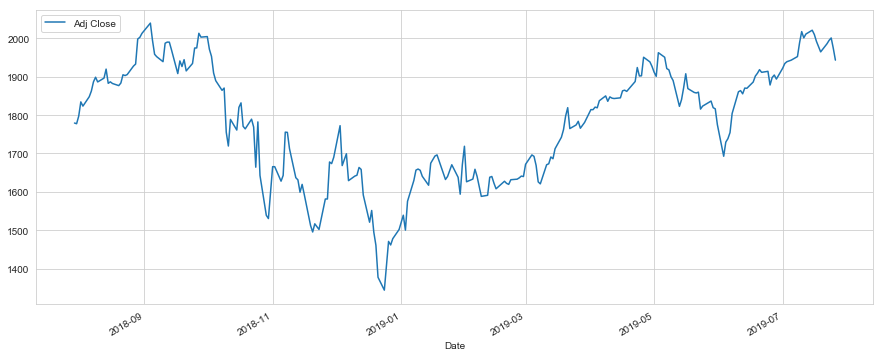

In [12]:
AMZN['Adj Close'].plot(legend = True, figsize = (15,6))

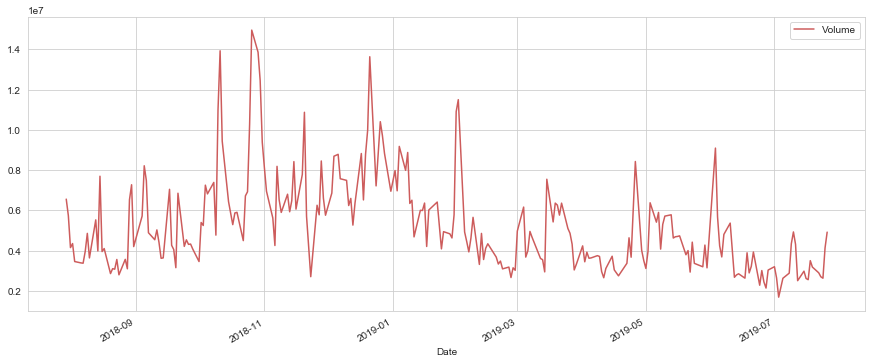

In [13]:
AMZN['Volume'].plot(legend = True, figsize = (15,6), color = 'indianred')

In [14]:
#Moving Averages: 

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMZN[column_name] = AMZN['Adj Close'].rolling(ma).mean()
    

In [16]:
AMZN.head(20)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2018-07-30,1829.500000,1766.020020,1827.329956,1779.219971,6562300,1779.219971,NaN,NaN,NaN
2018-07-31,1801.829956,1739.319946,1786.489990,1777.439941,5738700,1777.439941,NaN,NaN,NaN
2018-08-01,1798.439941,1776.020020,1784.000000,1797.170044,4153100,1797.170044,NaN,NaN,NaN
2018-08-02,1836.560059,1786.000000,1788.770020,1834.329956,4354700,1834.329956,NaN,NaN,NaN
2018-08-03,1841.000000,1821.500000,1837.739990,1823.290039,3460500,1823.290039,NaN,NaN,NaN
2018-08-06,1847.770020,1818.920044,1825.810059,1847.750000,3391800,1847.750000,NaN,NaN,NaN
2018-08-07,1869.719971,1846.270020,1854.530029,1862.479980,3377500,1862.479980,NaN,NaN,NaN
2018-08-08,1891.510010,1854.500000,1861.000000,1886.520020,3963000,1886.520020,NaN,NaN,NaN
2018-08-09,1914.569946,1877.479980,1882.000000,1898.520020,4860400,1898.520020,NaN,NaN,NaN


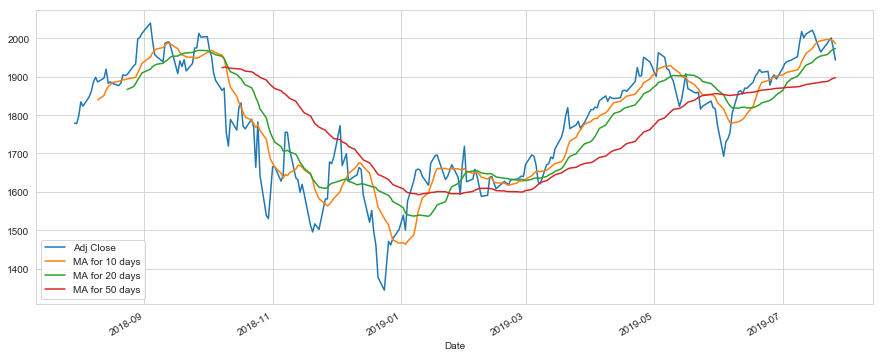

In [18]:
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False, figsize = (15,6))

In [19]:
#Finding daily returns - pandas has an inbuilt method called pct_change (Percent change) 

AMZN['Daily Returns'] = AMZN['Adj Close'].pct_change()

In [19]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Returns
Date,,,,,,,,,,
2018-07-17,1851.689941,1797.380005,1811.560059,1843.930054,5682900,1843.930054,NaN,NaN,NaN,NaN
2018-07-18,1858.880005,1831.270020,1848.000000,1842.920044,4861900,1842.920044,NaN,NaN,NaN,-0.000548
2018-07-19,1841.000000,1811.270020,1829.459961,1812.969971,4676900,1812.969971,NaN,NaN,NaN,-0.016251
2018-07-20,1834.839966,1810.060059,1825.010010,1813.699951,3884400,1813.699951,NaN,NaN,NaN,0.000403
2018-07-23,1819.000000,1769.989990,1812.209961,1802.000000,3888500,1802.000000,NaN,NaN,NaN,-0.006451


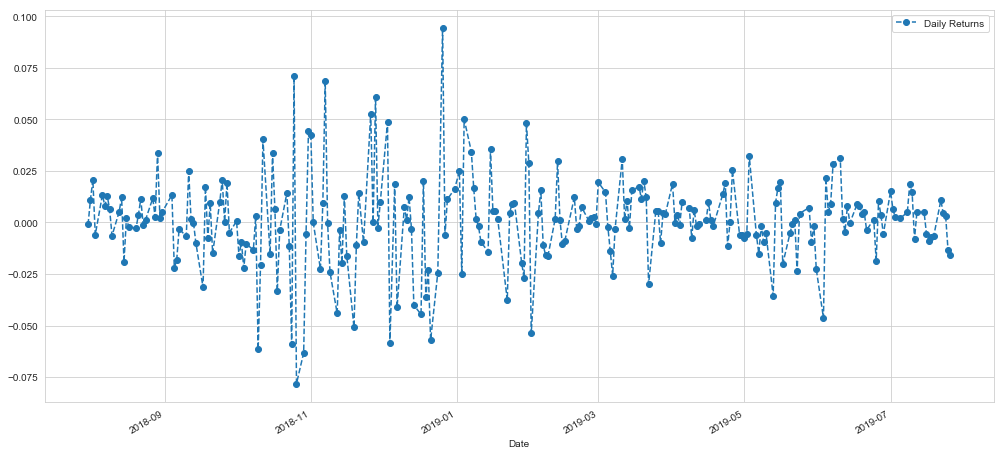

In [20]:
AMZN['Daily Returns'].plot(figsize = (17,8),legend = True, linestyle = '--', marker = 'o')

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

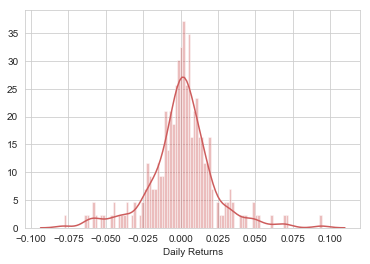

In [21]:
sns.distplot(AMZN['Daily Returns'],bins = 100, color = 'indianred')

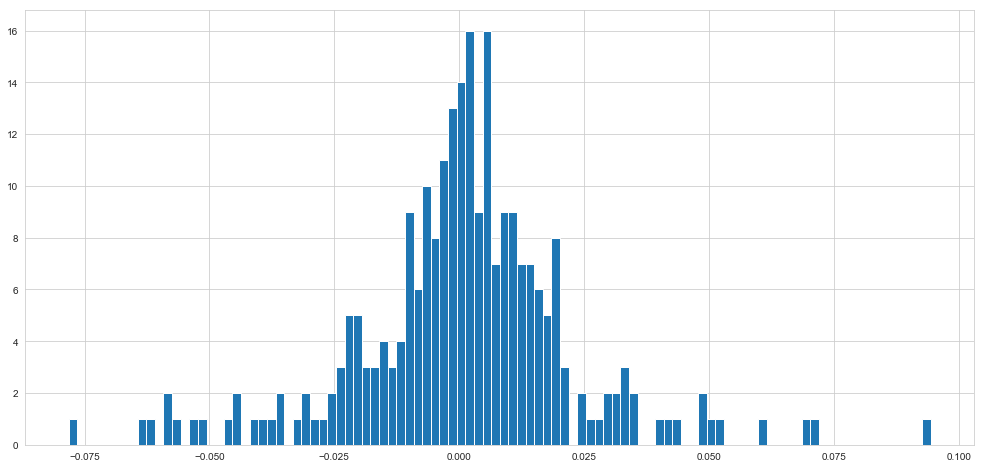

In [18]:
AMZN['Daily Returns'].hist(bins = 100, figsize = (17,8))

In [19]:
AMZN['Daily Returns'].describe()

count    250.000000
mean       0.000567
std        0.022269
min       -0.078197
25%       -0.009017
50%        0.001328
75%        0.011180
max        0.094452
Name: Daily Returns, dtype: float64

In [22]:
positive_returns = AMZN[AMZN['Daily Returns']>0]
positive_returns['Daily Returns'].describe()

count    135.000000
mean       0.014571
std        0.015767
min        0.000057
25%        0.004363
50%        0.009919
75%        0.018617
max        0.094452
Name: Daily Returns, dtype: float64

In [23]:
negative_returns = AMZN[(AMZN['Daily Returns']<=0 )]
negative_returns['Daily Returns'].describe()

count    114.000000
mean      -0.015947
std        0.016615
min       -0.078197
25%       -0.022124
50%       -0.009781
75%       -0.003958
max        0.000000
Name: Daily Returns, dtype: float64

In [24]:
#Now to compare closing price of all tech stocks

closing_df = DataReader(stock_list,'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-30,187.062546,1779.219971,1219.739990,103.686295
2018-07-31,187.436829,1777.439941,1217.260010,104.384949
2018-08-01,198.478760,1797.170044,1220.010010,104.581749
2018-08-02,204.280457,1834.329956,1226.150024,105.851128
2018-08-03,204.871445,1823.290039,1223.709961,106.313622


In [25]:
tech_returns = closing_df.pct_change()
tech_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-30,NaN,NaN,NaN,NaN
2018-07-31,0.002001,-0.001000,-0.002033,0.006738
2018-08-01,0.058910,0.011100,0.002259,0.001885
2018-08-02,0.029231,0.020677,0.005033,0.012138
2018-08-03,0.002893,-0.006019,-0.001990,0.004369


C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


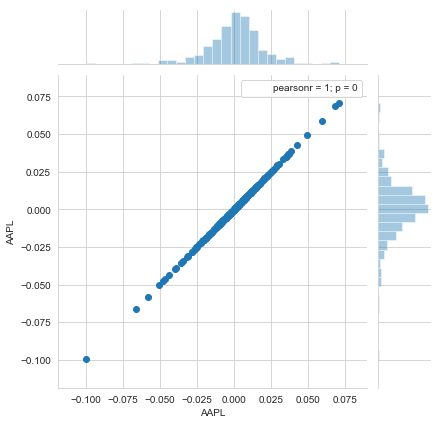

In [29]:
#To find correlation between the two stock's daily returns

AAPL_AAPL = sns.jointplot('AAPL','AAPL',kind = 'scatter', data = tech_returns)
AAPL_AAPL.annotate(stats.pearsonr)
plt.show()

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


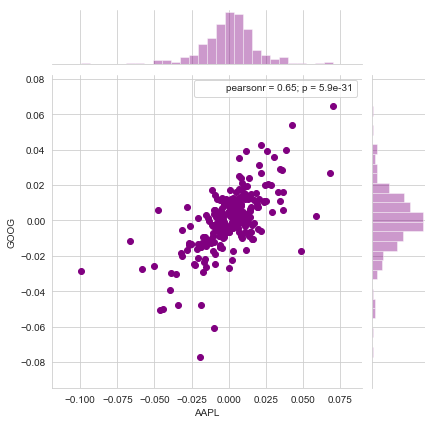

In [25]:
apple_google = sns.jointplot('AAPL','GOOG',kind = 'scatter', data = tech_returns, color = 'purple')
apple_google.annotate(stats.pearsonr)
plt.show()

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


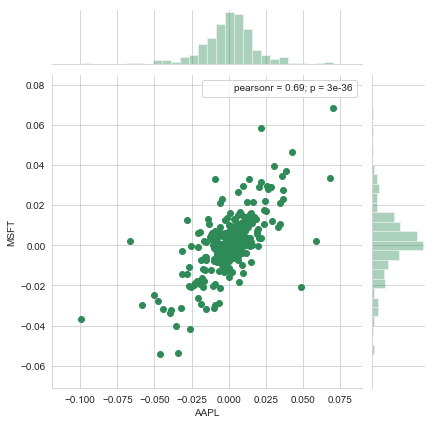

In [26]:
apple_microsoft = sns.jointplot('AAPL','MSFT',kind = 'scatter', data = tech_returns, color = 'seagreen')
apple_microsoft.annotate(stats.pearsonr)
plt.show()

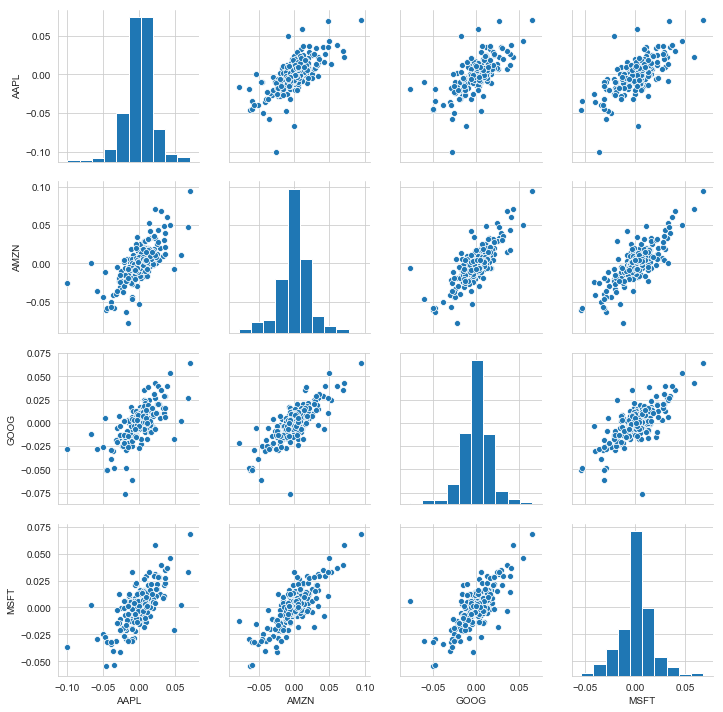

In [27]:
sns.pairplot(data = tech_returns.dropna() )

C:\Users\Aman Tukrel\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


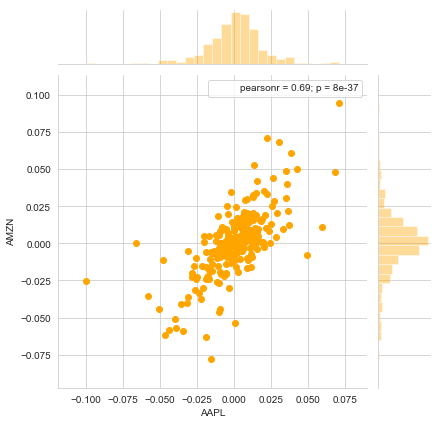

In [28]:
apple_amazon = sns.jointplot('AAPL','AMZN',kind = 'scatter', data = tech_returns, color = 'orange')
apple_amazon.annotate(stats.pearsonr)
plt.show()

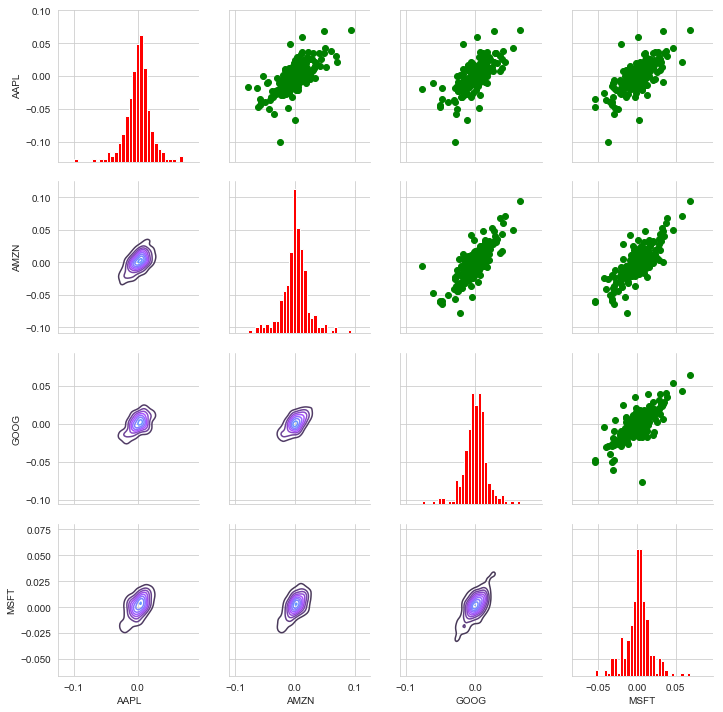

In [29]:
returns_fig = sns.PairGrid(data = tech_returns.dropna())
returns_fig.map_upper(plt.scatter, color = 'green')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist,bins = 30, color = 'red')

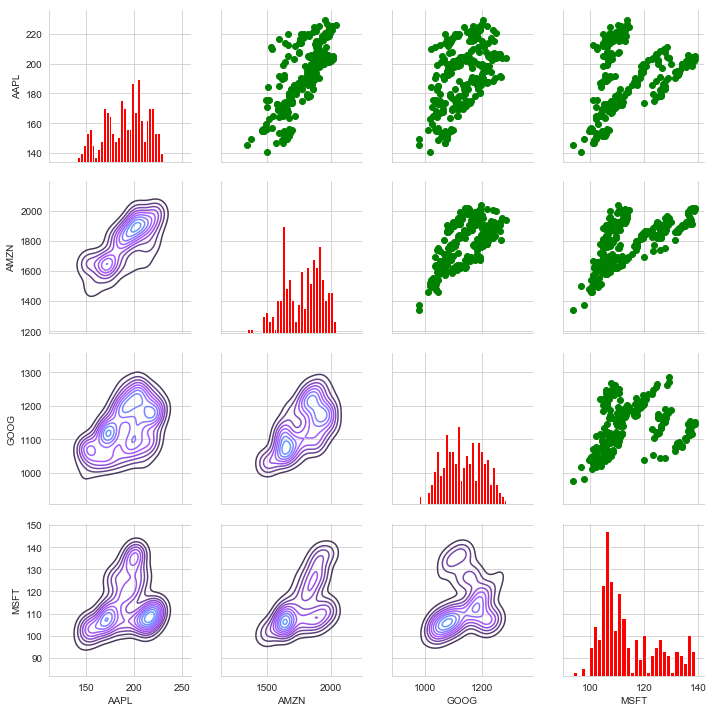

In [30]:
returns_fig = sns.PairGrid(data = closing_df.dropna())
returns_fig.map_upper(plt.scatter, color = 'green')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist,bins = 30, color = 'red')

In [30]:
x = closing_df['AAPL']
y = closing_df['GOOG']
np.corrcoef(x, y)

array([[1.        , 0.55150512],
       [0.55150512, 1.        ]])

In [31]:
x2 = closing_df['AAPL']
y2 = closing_df['MSFT']
np.corrcoef(x2, y2)

array([[1.        , 0.31928112],
       [0.31928112, 1.        ]])

In [32]:
x3 = closing_df['AMZN']
y3 = closing_df['GOOG']
np.corrcoef(x3, y3)

array([[1.        , 0.69523729],
       [0.69523729, 1.        ]])

In [33]:
# -- Worthwile to explore more -- 

x4 = closing_df['AMZN']
y4 = closing_df['AAPL']
np.corrcoef(x4, y4)

array([[1.        , 0.76802771],
       [0.76802771, 1.        ]])

In [34]:
x5 = closing_df['AMZN']
y5 = closing_df['MSFT']
np.corrcoef(x5, y5)

array([[1.        , 0.65702555],
       [0.65702555, 1.        ]])

In [35]:
x6 = closing_df['MSFT']
y6 = closing_df['GOOG']
np.corrcoef(x6, y6)

array([[1.        , 0.27420381],
       [0.27420381, 1.        ]])

In [36]:
returns  = tech_returns.dropna()

In [37]:
area = 40 * np.pi

No handles with labels found to put in legend.


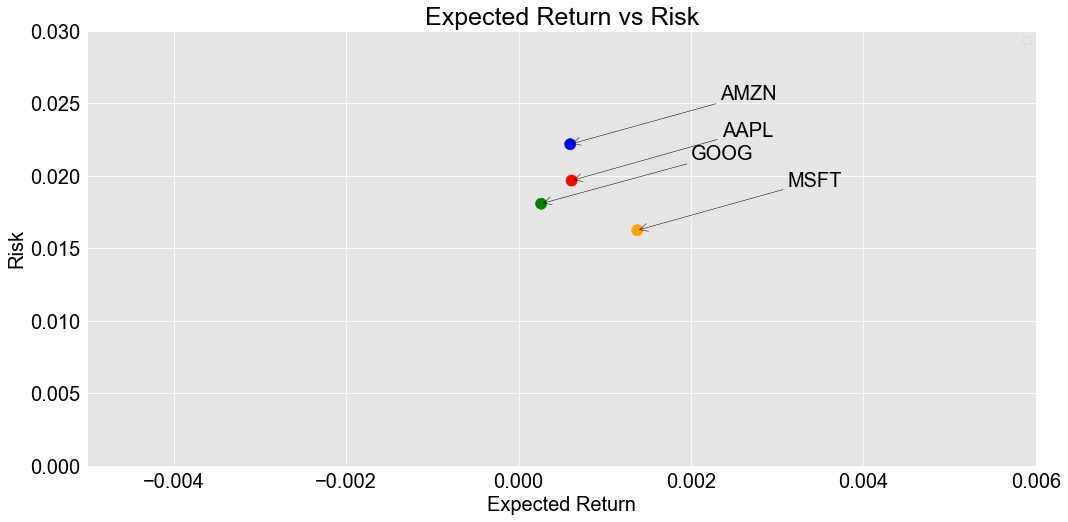

In [157]:
# Easy risk analysis
# Plot mean of returns (exp) vs std.dev of returns.(risk).. Returns obtained by pct.change() on 'adj close' 

plt.figure(figsize = (17,8))
plt.scatter(x = returns.mean(), y = returns.std(), s  = area, color = ['red','blue','green', 'orange'])
                                                                       


#Limits of the axis
plt.xlim(-0.005,0.006)
plt.ylim(0,0.03)

#Tick colors
plt.yticks(color = 'k', fontsize = 20)
plt.xticks(color  = 'k', fontsize = 20)

#Font size & color of axis name
plt.ylabel("Risk", fontsize = 20, color = 'black')

plt.xlabel("Expected Return", fontsize = 20, color = 'black')

#Annotate

for label, x , y in zip(returns.columns,returns.mean(),returns.std()):
    plt.annotate(label,
            xy = (x,y), xytext = (150,40),
             textcoords = 'offset points', ha = 'left', va = 'bottom', size = '20', color = 'k',
             arrowprops = dict(arrowstyle = '->',connectionstyle = 'arc3, rad = 0', color = 'black')
            )

plt.title('Expected Return vs Risk', fontsize = 25, color = 'k')

plt.legend()

    
    # ---------------MSFT has the highest return with lowest risk---------------
    # ---------------AMZN is a high risk stock---------------
    # ---------------GOOG is a low risk, low return stock---------------

In [41]:
tech_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-30,NaN,NaN,NaN,NaN
2018-07-31,0.002001,-0.001000,-0.002033,0.006738
2018-08-01,0.058910,0.011100,0.002259,0.001885
2018-08-02,0.029231,0.020677,0.005033,0.012138
2018-08-03,0.002893,-0.006019,-0.001990,0.004369


In [44]:
# 95% of the times, our worst daily loss in AAPL will not exceed 0.03%. 
tech_returns['AAPL'].quantile(0.05)

-0.031238582617096777

In [45]:
tech_returns['AMZN'].quantile(0.05)

-0.039148372850264956

In [46]:
#GOOG has lowest risk value in terms of daily returns. 95% of the times, the worst daily loss 
# will not exceed 2.65% 
tech_returns['GOOG'].quantile(0.05)

-0.02656456932427402

In [47]:
tech_returns['MSFT'].quantile(0.05)

-0.029399096686576674

In [48]:
# Calculating Value at Risk (VaR) using Monte Carlo Simulation - Geometric Brownian Motion

# delta (S) = S -1 ( mu * dt  + sigma * epsilon * sqrt (dt))

# S = stock price, mu = expected return, sigma = std dev of return , epsilon = N(0,1) ,dt = change in time

# https://www.investopedia.com/articles/07/montecarlo.asp

In [51]:
days = 365

dt = 1/days

mu = tech_returns['AMZN'].mean()

sigma = tech_returns['AMZN'].std()

In [53]:
def monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = sigma * np.sqrt(dt) * np.random.randn()
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (shock[x] + drift[x]))
        
        
    return price


    
    

In [54]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Returns
Date,,,,,,,,,,
2018-07-30,1829.500000,1766.020020,1827.329956,1779.219971,6562300,1779.219971,NaN,NaN,NaN,NaN
2018-07-31,1801.829956,1739.319946,1786.489990,1777.439941,5738700,1777.439941,NaN,NaN,NaN,-0.001000
2018-08-01,1798.439941,1776.020020,1784.000000,1797.170044,4153100,1797.170044,NaN,NaN,NaN,0.011100
2018-08-02,1836.560059,1786.000000,1788.770020,1834.329956,4354700,1834.329956,NaN,NaN,NaN,0.020677
2018-08-03,1841.000000,1821.500000,1837.739990,1823.290039,3460500,1823.290039,NaN,NaN,NaN,-0.006019


(array([1725., 1750., 1775., 1800., 1825., 1850., 1875., 1900., 1925.,
        1950.]), <a list of 10 Text yticklabel objects>)

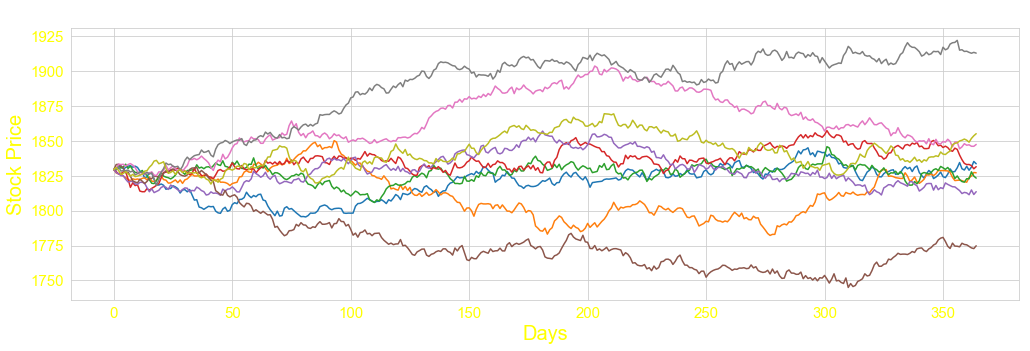

In [70]:
#Monte Carlo Simualtion for 365 days with 10 runs

start_price = 1829.5

plt.figure(figsize = (17,5))
for run in range(1,10):
    plt.plot(monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days', color ='yellow',fontsize = 20)
plt.ylabel('Stock Price',color = 'yellow', fontsize = 20)
plt.title('Monte Carlo Simulation for AMZN stock - 10 runs', color = 'white', fontsize = 20)
plt.xticks(color = 'yellow', fontsize = '15')
plt.yticks(color = 'yellow', fontsize = '15')

(array([1700., 1750., 1800., 1850., 1900., 1950., 2000.]),
 <a list of 7 Text yticklabel objects>)

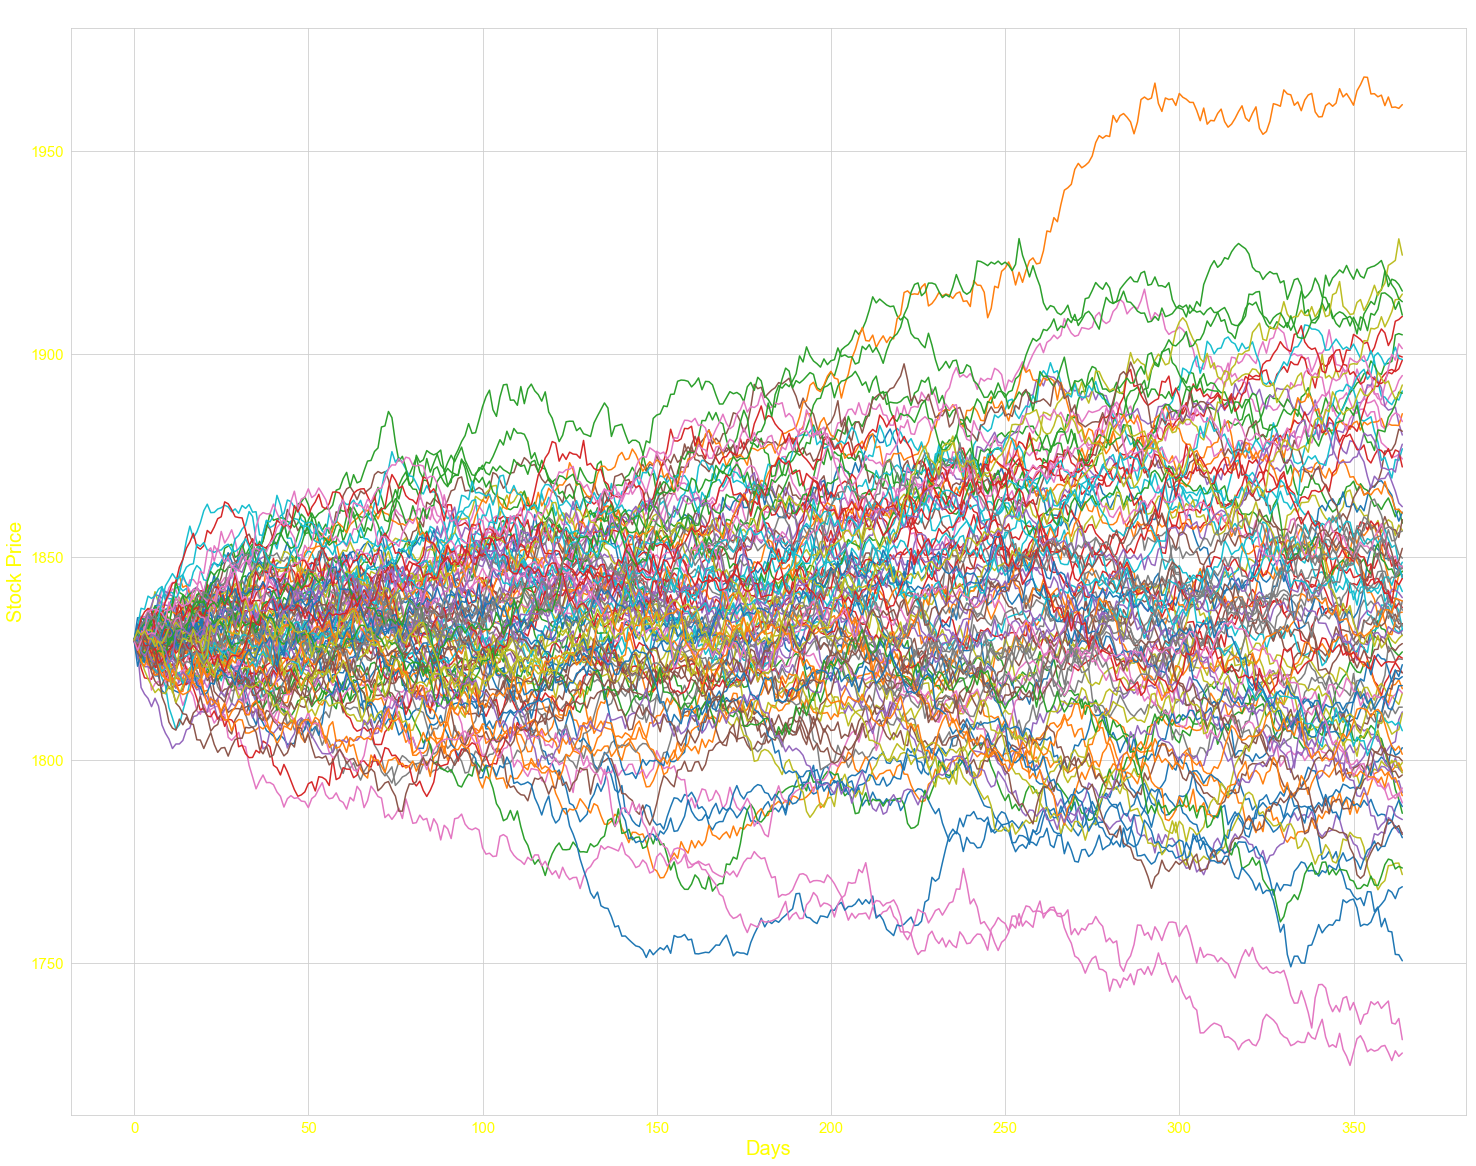

In [75]:
#Monte Carlo Simualtion for 365 days with 100 runs

start_price = 1829.5

plt.figure(figsize = (25,20))
for run in range(1,100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days', color ='yellow',fontsize = 20)
plt.ylabel('Stock Price',color = 'yellow', fontsize = 20)
plt.title('Monte Carlo Simulation for AMZN stock - 100 runs', color = 'white', fontsize = 20)
plt.xticks(color = 'yellow', fontsize = '15')
plt.yticks(color = 'yellow', fontsize = '15')


In [76]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Returns
Date,,,,,,,,,,
2019-07-22,1989.000000,1958.260010,1971.140015,1985.630005,2900000,1985.630005,1996.875012,1957.369507,1887.485403,0.010746
2019-07-23,1997.790039,1973.130005,1995.989990,1994.489990,2703500,1994.489990,1997.494006,1961.399005,1889.575603,0.004462
2019-07-24,2001.300049,1965.869995,1969.300049,2000.810059,2631300,2000.810059,1995.834009,1967.526007,1893.138203,0.003169
2019-07-25,2001.199951,1972.719971,2001.000000,1973.819946,4136500,1973.819946,1993.109009,1971.325507,1895.812202,-0.013490
2019-07-26,1950.900024,1924.510010,1942.000000,1943.050049,4921900,1943.050049,1986.314014,1973.264008,1897.250203,-0.015589


In [77]:

runs = 10000
simulations = np.zeros(runs)

#gathering data for the last day using 10,000 simulations
for run in range(runs):
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1]
    
    ## days - 1 because we want the 365th, i.e. the 364th index because index begins with zero
    
    

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text yticklabel objects>)

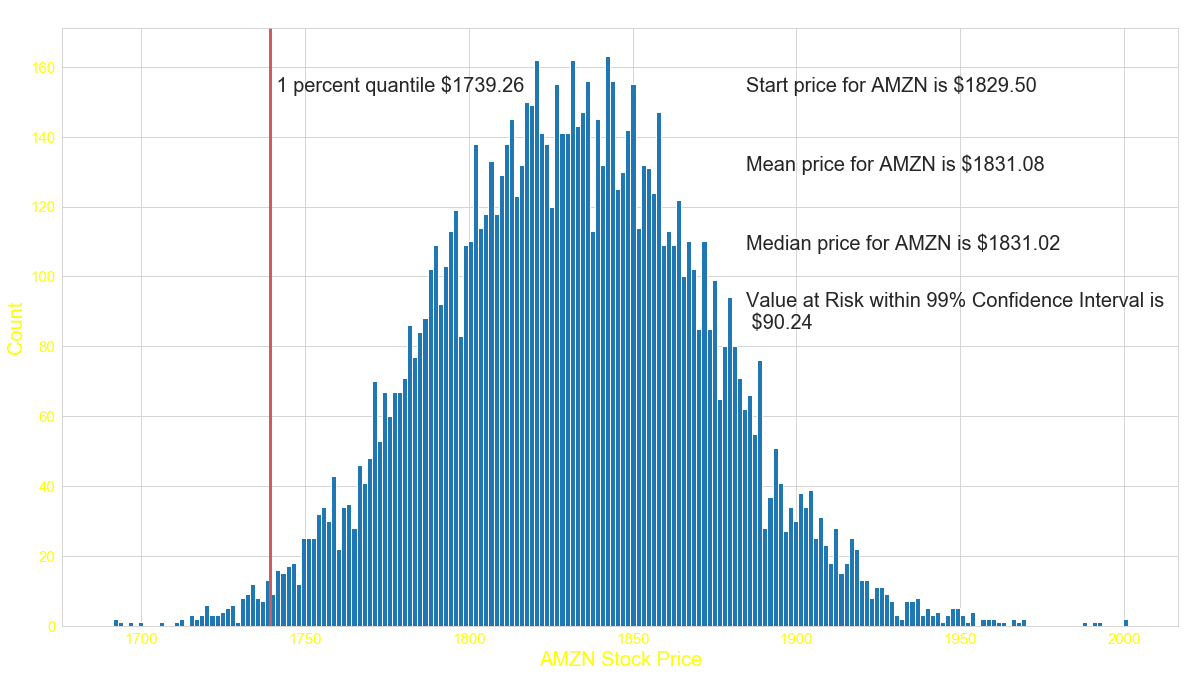

In [118]:
#1st percentile from the array of simulations

q = np.percentile(simulations,1)

m = np.median(simulations)

Var_99 = (start_price - q)

plt.figure(figsize = (20,11))

plt.hist(simulations, bins = 200)

#Start price
plt.figtext(0.6,0.8, s = "Start price for AMZN is $%.2f" %start_price, fontsize = 20)

#Mean price
plt.figtext(0.6,0.7, s = "Mean price for AMZN is $%.2f" %simulations.mean(), fontsize = 20)

#Median Price

plt.figtext(0.6,0.6, s = "Median price for AMZN is $%.2f" %m, fontsize = 20)

#Value at Risk - within 99% CI
plt.figtext(0.6,0.5, s = "Value at Risk within 99%% Confidence Interval is \n $%.2f" %Var_99, fontsize = 20)
# 99 % of the times you run Monte Carlo Simulation, your loss will not exceed $90

#1% quantile
plt.figtext(0.27,0.8, s = " 1 percent quantile $%.2f" %q, fontsize = 20)

#Draw a line at 1 percent quantile

plt.axvline(x = q, color = 'indianred', linewidth = 3)

#Axis formating
plt.xlabel('AMZN Stock Price', color ='yellow',fontsize = 20)
plt.ylabel('Count',color = 'yellow', fontsize = 20)
plt.title('Histogram of Monte Carlo Simulations on AMZN stock after %s runs for %s days' % (runs, days),
          color = 'white', fontsize = 20, weight = 'bold')
plt.xticks(color = 'yellow', fontsize = '15')
plt.yticks(color = 'yellow', fontsize = '15')


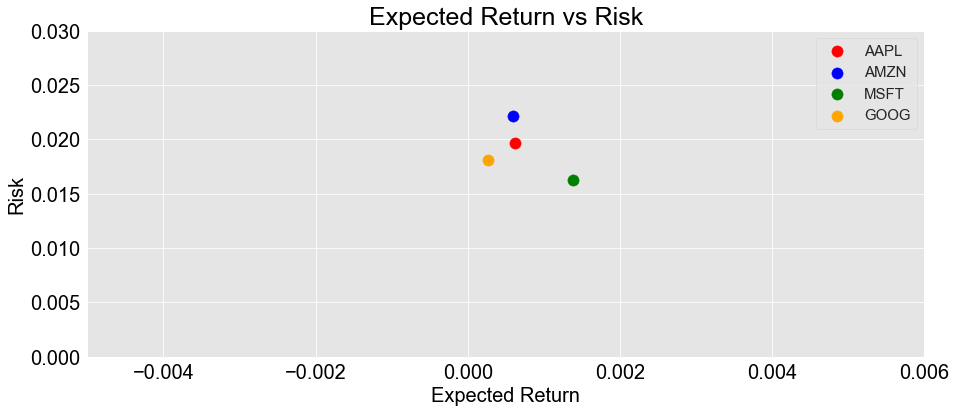

In [161]:
# Easy risk analysis
# Plot mean of returns (exp) vs std.dev of returns.(risk).. Returns obtained by pct.change() on 'adj close' 
fig = plt.figure(figsize  = (15,6))
ax1 = fig.add_subplot(111)

#4 scatter plots
ax1.scatter(x = returns['AAPL'].mean(), y = returns['AAPL'].std(), s = area, label = 'AAPL' , color = 'red')
ax1.scatter(x = returns['AMZN'].mean(), y = returns['AMZN'].std(), s = area, label = 'AMZN', color = 'blue')
ax1.scatter(x = returns['MSFT'].mean(), y = returns['MSFT'].std(), s = area, label = 'MSFT', color = 'green')
ax1.scatter(x = returns['GOOG'].mean(), y = returns['GOOG'].std(), s = area, label = 'GOOG', color = 'orange')

#Limits of the axis
plt.xlim(-0.005,0.006)
plt.ylim(0,0.03)

#Tick colors
plt.yticks(color = 'k', fontsize = 20)
plt.xticks(color  = 'k', fontsize = 20)

#Font size & color of axis name
plt.ylabel("Risk", fontsize = 20, color = 'black')

plt.xlabel("Expected Return", fontsize = 20, color = 'black')

#Annotate


plt.title('Expected Return vs Risk', fontsize = 25, color = 'k')

ax1.legend(fontsize  = 15)

plt.show()    
    # ---------------MSFT has the highest return with lowest risk---------------
    # ---------------AMZN is a high risk stock---------------
    # ---------------GOOG is a low risk, low return stock---------------